In [ ]:
%run -i main.py --data_root='data' --target='indiv'
%run -i main.py --data_root='data' --target='global'

In [1]:
import os 
import os.path as osp 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_theme()

import utils

In [2]:
categoryPath = osp.join(".","Action_category_eng.xlsx")
df_category = utils.read_excel(categoryPath)
df_category

,category1,category2,category3,category4,category5,category6
num,,,,,,
1,eye/eyebrow,covered face,eye/eyebrow,noding head,noding head,action with chair
2,nose,covered trunk,nose/philtrum,frowning face,frowning face,touching the body
3,mouth/lips,not covered,mouth/lips/tongue,shaping hands/arms,shaking head,touching objects
4,cheek,etc,cheek,laugh/smile,laugh/smile,action with desk
5,neck,NaN,neck,shaking shoulder,yawn,yawn
6,chin,NaN,ear,oh/surprised,surprised,out of sight
7,hand,NaN,forehead,speak,tongue out,interaction_something
8,arm/shoulder,NaN,chin,tilting head,tilting head,face_etc
9,body_trunk,NaN,face,point something,crossing arms,no_face_bodyparts_etc


# Visualize Mean - (indiv)

In [3]:
meanPath = osp.join('.', 'indiv_Means.csv')

mean_df = utils.read_csv(meanPath)
mean_df

,category1,category2,category3,category4,category5,category6
0,0.019027,-0.484364,-0.117124,-0.108265,-0.108265,-0.044485
1,-0.256019,0.001423,-0.100993,-0.073433,-0.040775,-0.133038
2,0.041636,-0.005907,0.042968,0.132360,0.070003,-0.403189
3,-0.112817,0.000000,-0.031787,-0.013684,-0.013684,0.194391
4,-0.040606,NaN,-0.063240,0.969851,-0.161649,-0.161649
5,0.330878,NaN,-0.363588,0.248501,0.248501,0.056158
6,-0.048220,NaN,0.082911,-0.094496,-0.041214,-0.007207
7,-0.002893,NaN,0.176754,0.222746,-0.699042,0.007883
8,-0.034717,NaN,-0.035229,-0.237705,0.428247,0.016056
9,-0.052047,NaN,-0.187194,0.070003,-0.001683,0.030012


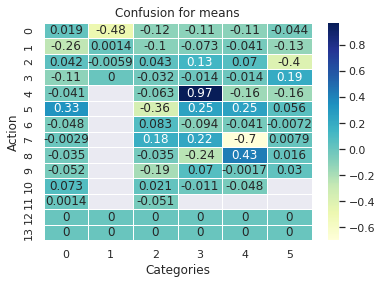

In [6]:
utils.vis_dataFrame(df=mean_df, title="Confusion for means", xlabel="Categories", ylabel="Action", fmt='.2g')

# Visualize Nums - (indiv)

In [7]:
numPath = osp.join('.', 'indiv_Nums.csv')

num_df = utils.read_csv(numPath)
num_df

,category1,category2,category3,category4,category5,category6
0,205.0,82.0,249.0,57.0,57.0,640.0
1,31.0,37.0,96.0,114.0,128.0,365.0
2,950.0,5164.0,962.0,23.0,21.0,38.0
3,5.0,0.0,16.0,161.0,161.0,42.0
4,685.0,NaN,736.0,1.0,139.0,139.0
5,21.0,NaN,21.0,30.0,30.0,46.0
6,734.0,NaN,20.0,26.0,3.0,450.0
7,1099.0,NaN,60.0,17.0,1.0,1690.0
8,1614.0,NaN,477.0,3.0,22.0,2080.0
9,435.0,NaN,32.0,21.0,4162.0,38.0


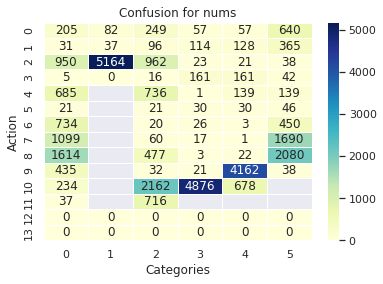

In [8]:
utils.vis_dataFrame(df=num_df, title="Confusion for nums", xlabel="Categories", ylabel="Action", fmt=".4g")

***

# Visualize Means/Nums - (global)

In [9]:
global_meanPath = osp.join('.', 'global_Means.csv')
global_numPath = osp.join('.', 'global_Nums.csv')


df_Gmean = utils.read_csv(global_meanPath)
df_Gnum = utils.read_csv(global_numPath)

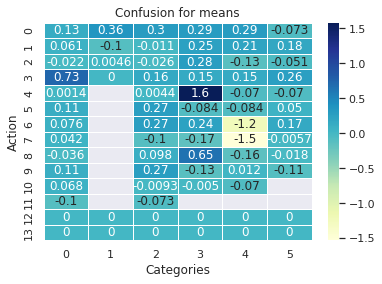

In [10]:
utils.vis_dataFrame(df=df_Gmean, title="Confusion for means", xlabel="Categories", ylabel="Action", fmt=".2g")

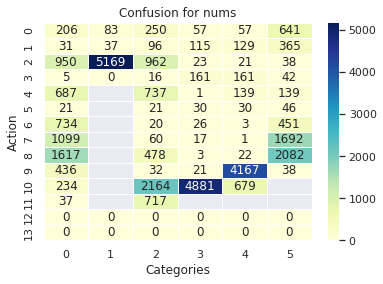

In [11]:
utils.vis_dataFrame(df=df_Gnum, title="Confusion for nums", xlabel="Categories", ylabel="Action", fmt=".4g")

***

# 뇌파 소팅 (Indiv feature)

In [12]:
col_list = mean_df.columns.values.tolist()

brain_case = [] 
num_case = [] 
action_case = [] 
for i in col_list:
    brain_arr = mean_df[i].to_numpy().reshape(-1,1)
    act_arr = df_category[i].to_numpy().reshape(-1,1)
    num_arr = num_df[i].to_numpy().reshape(-1,1)

    brain_arr = brain_arr[:-2]
    sorted_idx = np.argsort(brain_arr, axis=0)

    brain_case.append(brain_arr[sorted_idx].reshape(-1,1))
    num_case.append(num_arr[sorted_idx].reshape(-1,1))
    action_case.append(act_arr[sorted_idx].reshape(-1,1))


heat_brain = np.hstack(brain_case)
heat_num = np.hstack(num_case)
heat_act = np.hstack(action_case) 

Text(156.5, 0.5, 'signal')

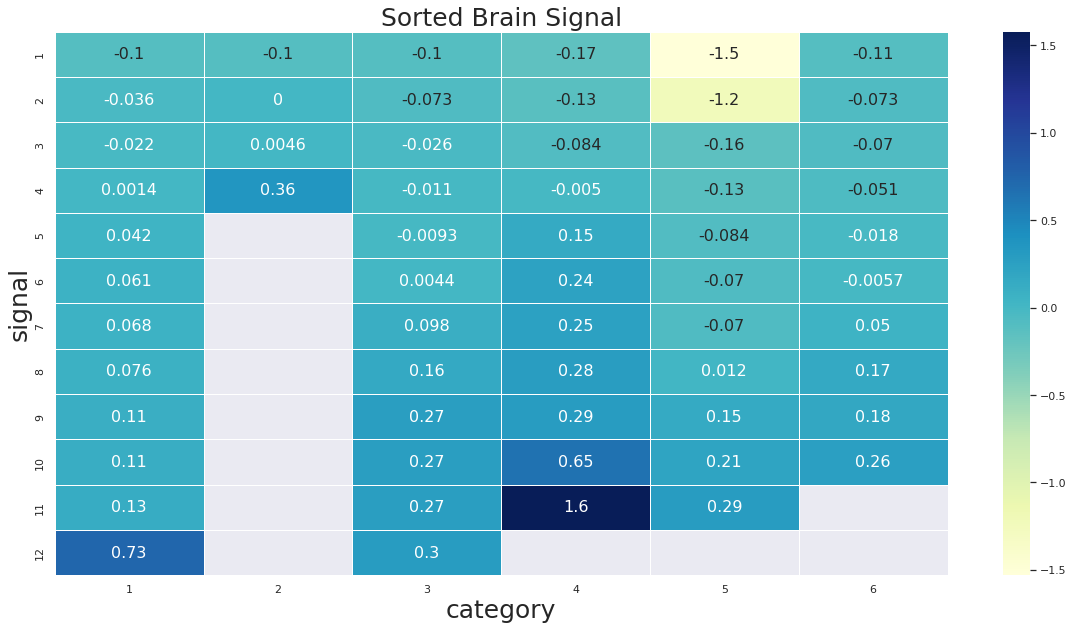

In [41]:
plt.subplots(figsize=(20,10))  # (ref) https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
ax = sns.heatmap(heat_brain, annot=True, linewidths=.5, cmap="YlGnBu", fmt=".2g", annot_kws={'size':16})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Sorted Brain Signal", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("signal", fontsize=25)

Text(156.5, 0.5, 'action')

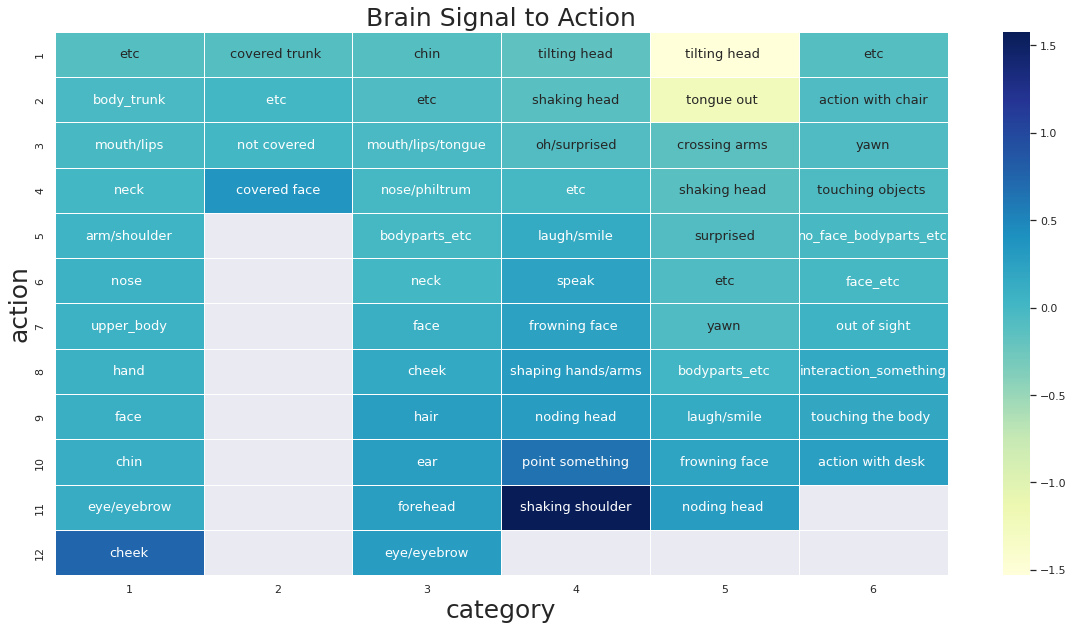

In [42]:
plt.subplots(figsize=(20,10))
ax = sns.heatmap(heat_brain, annot=heat_act, linewidths=0.5, cmap="YlGnBu", fmt='s', annot_kws={'size':13})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Brain Signal to Action", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("action", fontsize=25)

Text(156.5, 0.5, 'frequency')

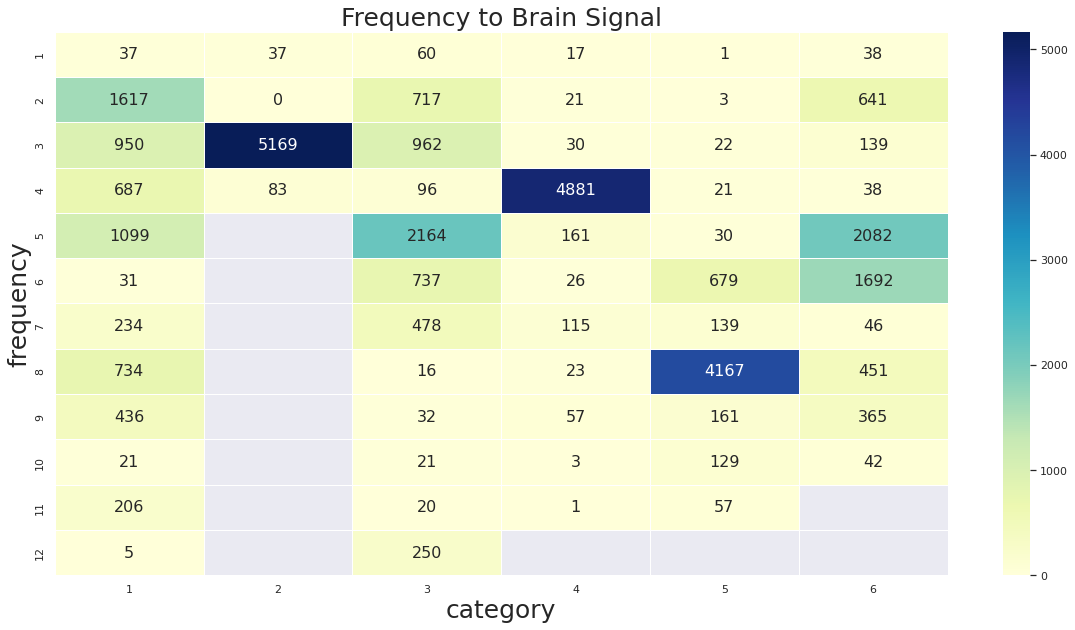

In [43]:
plt.subplots(figsize=(20,10))  # (ref) https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
ax = sns.heatmap(heat_num, annot=True, linewidths=.5, cmap="YlGnBu", fmt=".4g", annot_kws={'size':16})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Frequency to Brain Signal", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("frequency", fontsize=25)

# 뇌파 소팅 (Global feature)

In [34]:
col_list = df_Gmean.columns.values.tolist()

brain_case = [] 
num_case = [] 
action_case = [] 
for i in col_list:
    brain_arr = df_Gmean[i].to_numpy().reshape(-1,1)
    act_arr = df_category[i].to_numpy().reshape(-1,1)
    num_arr = df_Gnum[i].to_numpy().reshape(-1,1)

    brain_arr = brain_arr[:-2]
    sorted_idx = np.argsort(brain_arr, axis=0)

    brain_case.append(brain_arr[sorted_idx].reshape(-1,1))
    num_case.append(num_arr[sorted_idx].reshape(-1,1))
    action_case.append(act_arr[sorted_idx].reshape(-1,1))


heat_brain = np.hstack(brain_case)
heat_num = np.hstack(num_case)
heat_act = np.hstack(action_case) 

Text(156.5, 0.5, 'signal')

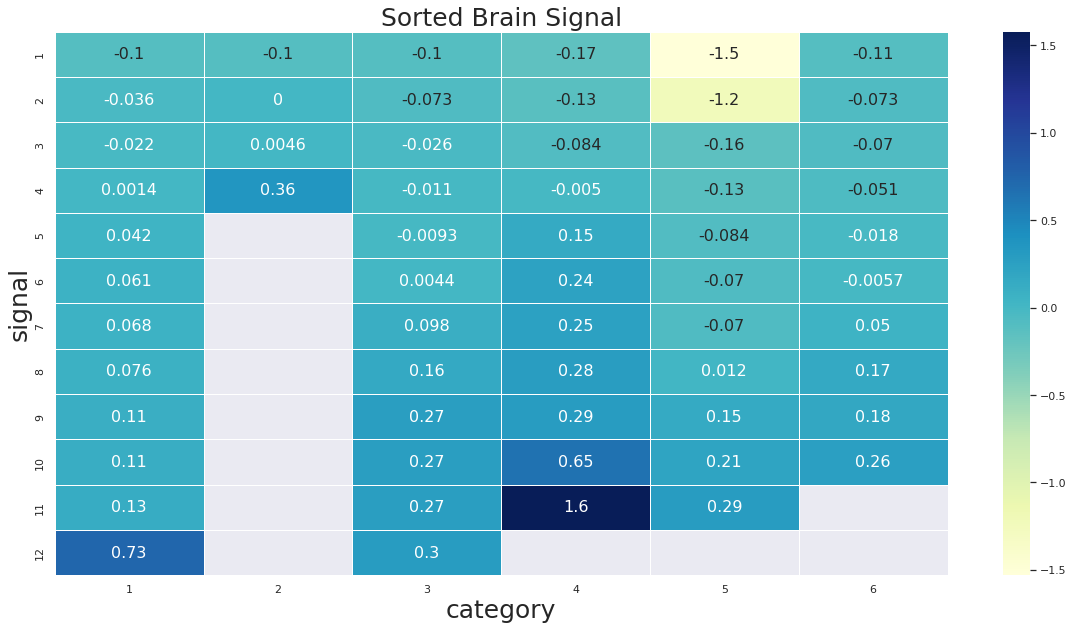

In [44]:
plt.subplots(figsize=(20,10))  # (ref) https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
ax = sns.heatmap(heat_brain, annot=True, linewidths=.5, cmap="YlGnBu", fmt=".2g", annot_kws={'size':16})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Sorted Brain Signal", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("signal", fontsize=25)

Text(156.5, 0.5, 'action')

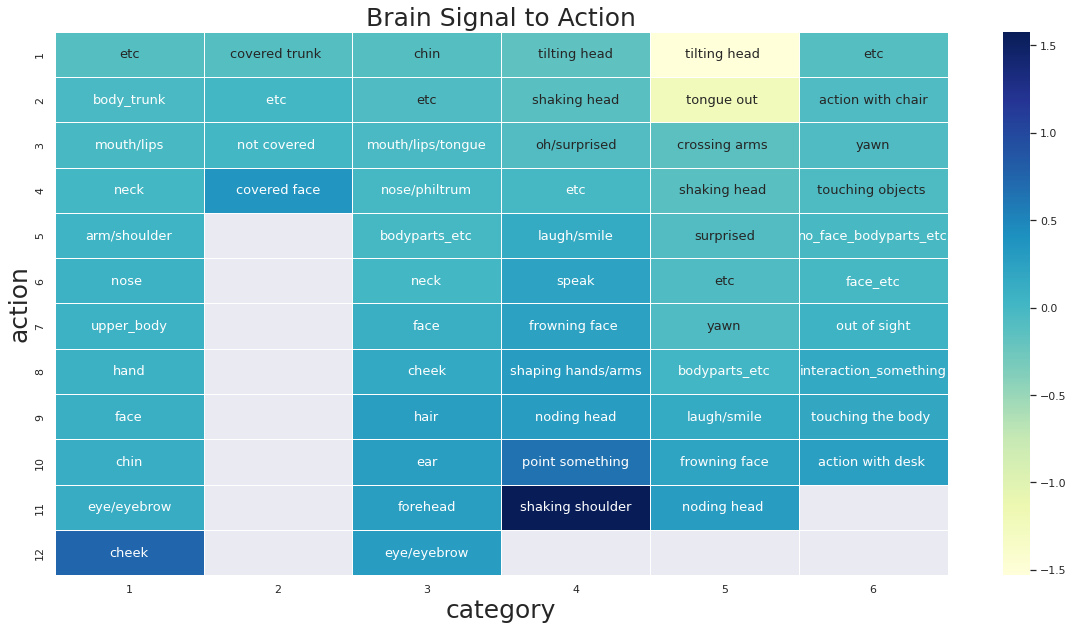

In [45]:
plt.subplots(figsize=(20,10))
ax = sns.heatmap(heat_brain, annot=heat_act, linewidths=0.5, cmap="YlGnBu", fmt='s', annot_kws={'size':13})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Brain Signal to Action", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("action", fontsize=25)

Text(156.5, 0.5, 'frequency')

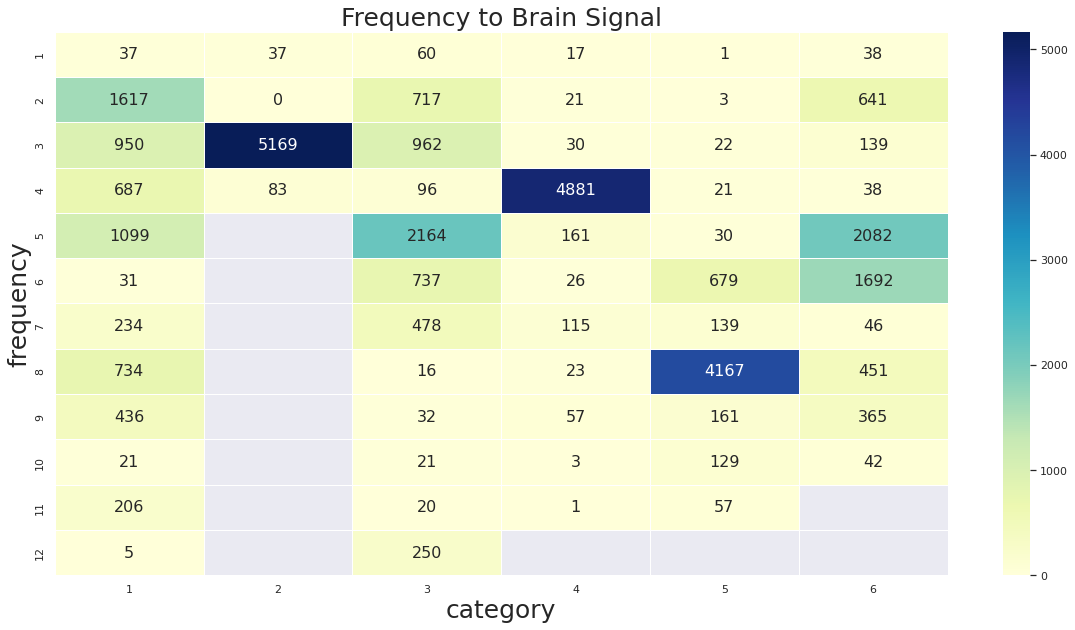

In [46]:
plt.subplots(figsize=(20,10))  # (ref) https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
ax = sns.heatmap(heat_num, annot=True, linewidths=.5, cmap="YlGnBu", fmt=".4g", annot_kws={'size':16})
ax.set_xticklabels(range(1,7)) 
ax.set_yticklabels(range(1,13)) 
plt.title("Frequency to Brain Signal", fontsize=25)
plt.xlabel("category", fontsize=25)
plt.ylabel("frequency", fontsize=25)